['jump', 'bump', 'thump', 'clump', 'lump', 'dump', 'break', 'streak', 'peak', 'creak', 'speak', 'some', 'become', 'come', 'welcome', 'google', 'goggle', 'toggle', 'boggle', 'was', 'were', 'been', 'catch', 'latch', 'snatch', 'dispatch', 'mismatch', 'bite', 'ignite', 'incite', 'forget', 'forgo', 'forclose']
ngram_length 2
(33, 1000)
((33, 33), (33,), (1000, 1000))
(33, 2) (2, 2) (2, 1000) (2, 1000)
(33, 3) (3, 3) (3, 1000) (3, 1000)


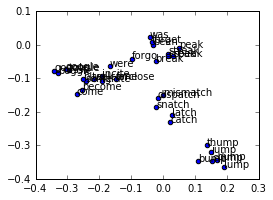

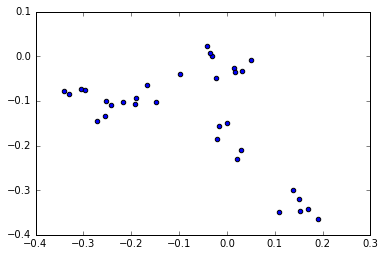

figures/latent_space-ngram_length=2-N=1000-W=33-170427


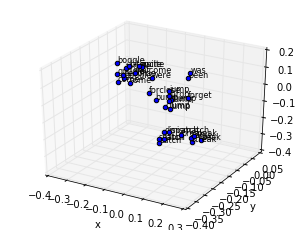

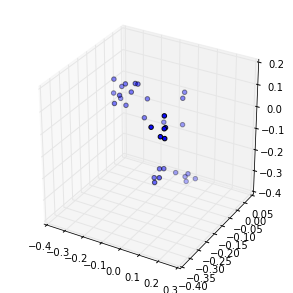

figures/latent_space-words-3d-ngram_length=2-N=1000-W=33-170427
ngram_length 3
(33, 1000)
((33, 33), (33,), (1000, 1000))
(33, 2) (2, 2) (2, 1000) (2, 1000)
(33, 3) (3, 3) (3, 1000) (3, 1000)


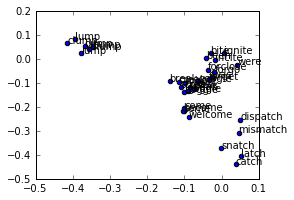

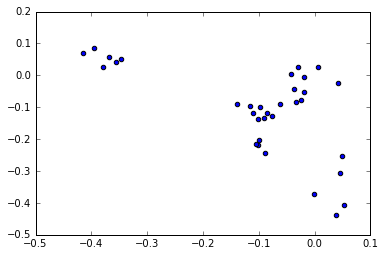

figures/latent_space-ngram_length=3-N=1000-W=33-170427


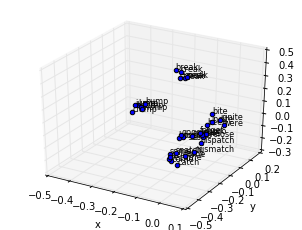

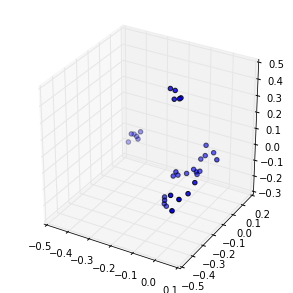

figures/latent_space-words-3d-ngram_length=3-N=1000-W=33-170427
ngram_length 4
(33, 1000)
((33, 33), (33,), (1000, 1000))
(33, 2) (2, 2) (2, 1000) (2, 1000)
(33, 3) (3, 3) (3, 1000) (3, 1000)


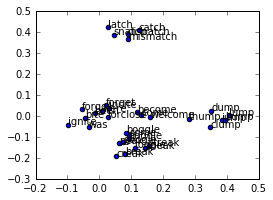

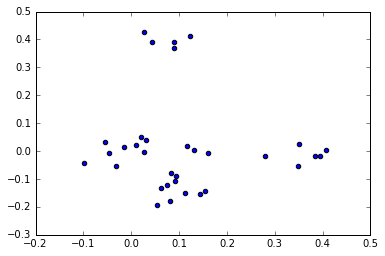

figures/latent_space-ngram_length=4-N=1000-W=33-170427


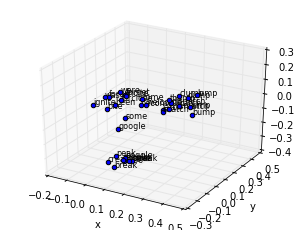

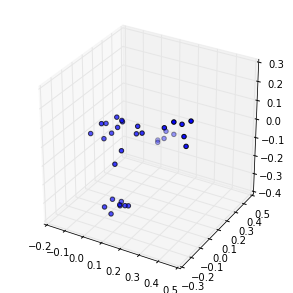

figures/latent_space-words-3d-ngram_length=4-N=1000-W=33-170427


In [4]:
import time
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import string
import random
import scipy
from matplotlib import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import accuracy_score

N = 1000
alphabet = string.ascii_lowercase + '#' + '.'
D = len(alphabet)
z = np.ones(N)

RI_pres = np.random.rand(D, N)
RI_pres = np.where(RI_pres>0.5, 1, -1)

RI_past = np.random.rand(D, N)
RI_past = np.where(RI_past>0.5, 1, -1)

def ngram_encode(ngram_str, letter_vecs, window=3):
    vec = np.zeros(letter_vecs.shape[1])
    full_str = '#' + ngram_str + '.'
    for il, l in enumerate(full_str[:-(window-1)]):
        trivec = letter_vecs[alphabet.find(full_str[il]), :]
        for c3 in range(1, window):
            trivec = trivec * np.roll(letter_vecs[alphabet.find(full_str[il+c3]), :], c3)
            
        vec += trivec
    return vec

def ngram_encode_cl(ngram_str, letter_vecs, window=3):
    vec = np.zeros(letter_vecs.shape[1])
    full_str = '#' + ngram_str + '.'
    for il, l in enumerate(full_str[:-(window-1)]):
        trivec = letter_vecs[alphabet.find(full_str[il]), :]
        for c3 in range(1, window):
            trivec = trivec * np.roll(letter_vecs[alphabet.find(full_str[il+c3]), :], c3)     
        vec += trivec
    return 2* (vec + 0.1*(np.random.rand(letter_vecs.shape[1])-0.5) < 0) - 1

words = open("data/cleaned/latent_space.txt","r").read().split()
print words
num_words = len(words)
data_matrix = np.zeros((num_words, N))
ngram_lengths = [2, 3, 4]

for ngram_length in ngram_lengths:
    print "ngram_length %d" % ngram_length
    for i in range(num_words):
        data_matrix[i] = ngram_encode_cl(words[i], RI_pres, ngram_length)
    print data_matrix.shape

    ds = [2, 3]

    U, s, V = np.linalg.svd(data_matrix, full_matrices=True)
    print (U.shape, s.shape, V.shape) 
    pca_data = []
    for d in ds:
        Ud = U[:, :d]
        Sd = s[:d]*np.eye(d)
        Vd = V[:d, :]
        SdVd = np.dot(Sd, Vd)
        print Ud.shape, Sd.shape, Vd.shape, SdVd.shape
        pca_data.append(Ud)
    # 2d
    fig, ax = plt.subplots(figsize=(4,3))
    ax.scatter(pca_data[0][:,0], pca_data[0][:,1])
    for i, txt in enumerate(words):
        ax.annotate(txt, (pca_data[0][i,0], pca_data[0][i,1]))

    plt.figure()
    plt.scatter(pca_data[0][:,0], pca_data[0][:,1])
    plt.show()
    fname =  ('figures/latent_space-ngram_length=' + str(ngram_length) + '-N=' + str(N) + '-W=' + str(num_words) 
          + '-' + time.strftime('%y%m%d'))
    print fname

    plt.savefig(fname + '.png', transparent=True)
    plt.savefig(fname + '.eps', transparent=True)

    #3d
    fig = pylab.figure(figsize=(4,3))
    ax = Axes3D(fig)
    for i in range(num_words):
        ax.scatter(pca_data[1][i,0], pca_data[1][i,1], pca_data[1][i,2]) 
        ax.text(pca_data[1][i,0], pca_data[1][i,1], pca_data[1][i,2],  '%s' % (words[i]), size=8, zorder=1, color='k') 

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    pyplot.show()

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_data[1][:,0], pca_data[1][:,1], pca_data[1][:,2])

    plt.show()
    fname =  ('figures/latent_space-words-3d-ngram_length=' + str(ngram_length) + '-N=' + str(N) + '-W=' + str(num_words) 
          + '-' + time.strftime('%y%m%d'))
    print fname

    plt.savefig(fname + '.png', transparent=True)
    plt.savefig(fname + '.eps', transparent=True)